In [25]:
using Plots, DataFrames, CSV, Statistics, StatsBase

# Analise Exploratória no Dataset Iris

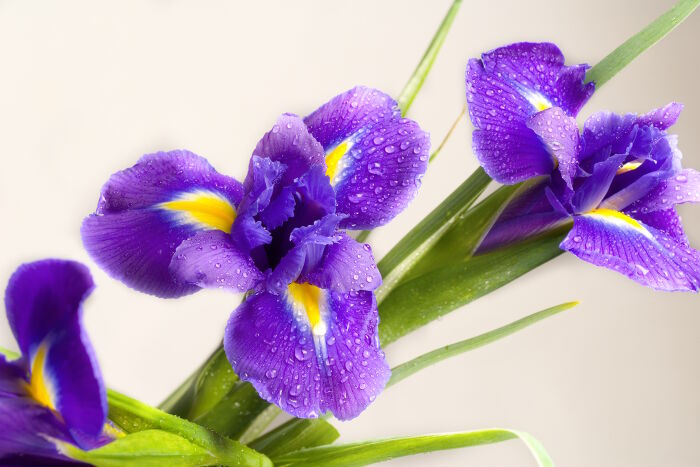

## Carregar o Dataset
A primeira tarefa que deve ser feita é carregar o **dataset das espécies de flores iris** em um DataFrame, isto é, uma _estrutura de dados tabular_. A partir dela usaremos estatistica descritiva, algebra linear e machine learning para conseguirmos fazer observações, previsões e algumas conclusões sobre os dados

In [26]:
irisdf = CSV.read("data/iris.csv", DataFrame)
first(irisdf, 5)

Row,slength,swidth,plength,pwidth,species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Considerações Sobre os Dados Carregados
Podemos observar que o dataset possui _5 variáveis_, sendo a última delas, **categórica**. Temos _largura e comprimento_ das **sépalas** em cm, _largura e comprimento_ das **pétalas** em cm. Por último espécies, no qual se dividem entre **setosa**, **virginica** e **versicolor**. Também temos 150 observações, 50 para cada espécie. 3 duplicatas foram encontrada, e nenhuma entrada nula.

In [27]:
let
	setosa = count((x) -> x == "Iris-setosa", irisdf.species)
	@show setosa
	virginica = count((x) -> x == "Iris-virginica", irisdf.species)
	@show virginica
	versicolor = count((x)-> x == "Iris-versicolor", irisdf.species)
	@show virginica
	len = nrow(irisdf)
	@show len
	duplicates = length(findall(nonunique(irisdf)))
	@show duplicates
    nothing
end

setosa = 50
virginica = 50
virginica = 50
len = 150
duplicates = 3


## Análise Univariada
Podemos observar os valores mínimos, médios, medianos e máximos do dataset. É possível perceber que nenhum dado foi perdido ou está ausente. Das espécies a maior mediana se encontra no **comprimento da sépala**, o que nos mostra que as sépalas sempre serão em média, mais compridas que as pétalas. Também as sépalas serão mais largas que as pétalas.
O comprimento das pétalas apresenta maior desvio, ou seja, dos dados apresentam maior dispersão, o que nos leva a concluir que existem pétalas com de variados comprimentos. A variável largura da sépala se apresenta mais homogênea.

Concluímos pelos histogramas que:

* **Virginicas** possuem sépalas mais compridas e pétalas mais largas
* **Setosas** possuem sépalas mais largas
* **Versicolors** possuem sépalas e pétalas homogêneas

In [28]:
let
	@show describe(irisdf)
	stdslength = std(irisdf.slength)
	@show stdslength
	stdswidth = std(irisdf.swidth)
	@show stdswidth
	stdplength = std(irisdf.plength)
	@show stdplength
	stdpwidth = std(irisdf.pwidth)
	@show stdpwidth
	nothing
end

describe(irisdf) = 5×7 DataFrame
 Row │ variable  mean     min          median  max             nmissing  eltype
     │ Symbol    Union…   Any          Union…  Any             Int64     DataType
─────┼────────────────────────────────────────────────────────────────────────────
   1 │ slength   5.84333  4.3          5.8     7.9                    0  Float64
   2 │ swidth    3.054    2.0          3.0     4.4                    0  Float64
   3 │ plength   3.75867  1.0          4.35    6.9                    0  Float64
   4 │ pwidth    1.19867  0.1          1.3     2.5                    0  Float64
   5 │ species            Iris-setosa          Iris-virginica         0  String15
stdslength = 0.828066127977863
stdswidth = 0.43359431136217363
stdplength = 1.7644204199522626
stdpwidth = 0.7631607417008412


### Histograma

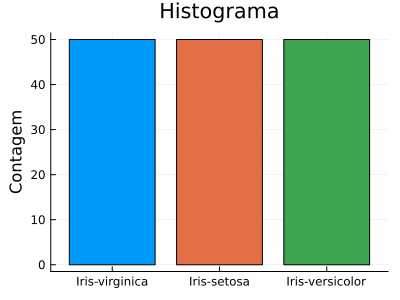

In [29]:
bar(countmap(irisdf.species), legend=:none, c=[1, 2, 3], size=(400, 300))
title!("Histograma")
ylabel!("Contagem" )

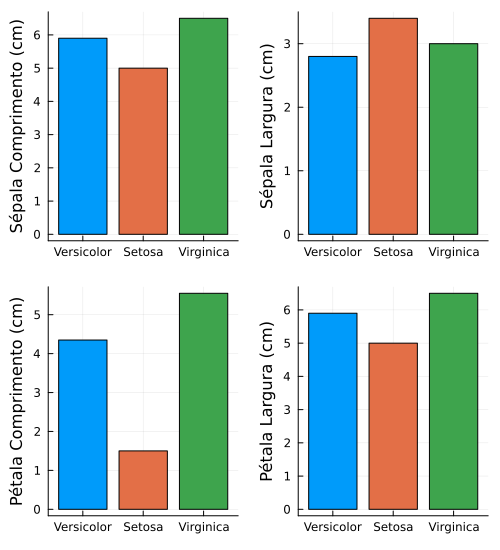

In [30]:
let
    function getMeanBySpecies(var::Symbol)::Dict{AbstractString, Float64}
        setosa = median(irisdf[irisdf[!, :species] .== "Iris-setosa", var])
        virginica = median(irisdf[irisdf[!, :species] .== "Iris-virginica", var])
        versicolor = median(irisdf[irisdf[!, :species] .== "Iris-versicolor", var])
        Dict("Setosa" => setosa, "Virginica" => virginica, "Versicolor" => versicolor)
    end

    slength = getMeanBySpecies(:slength)
    swidth = getMeanBySpecies(:swidth)
    plength = getMeanBySpecies(:plength)
    pwidth = getMeanBySpecies(:pwidth)

    p1 = bar(slength, legend = :none, c=[1, 2, 3],
            ylabel="Sépala Comprimento (cm)");
    p2 = bar(swidth, legend = :none, c=[1, 2, 3],
            ylabel="Sépala Largura (cm)");
    p3 = bar(plength, legend = :none, c=[1, 2, 3],
            ylabel="Pétala Comprimento (cm)");
    p4 = bar(slength, legend = :none, c=[1, 2, 3],
            ylabel="Pétala Largura (cm)");

    plot(p1, p2, p3, p4, layout=(2, 2), size=(500, 550))
end

## Análise Bivariada

## Análise Bivariada
Analisaremos o relacionamento entre duas variáveis do dataset: **largura da sépala** e **comprimento da sépala**. usando uma visualização de dispersão conseguimos ter uma idéia de como essas váriáveis estão agrupadas.

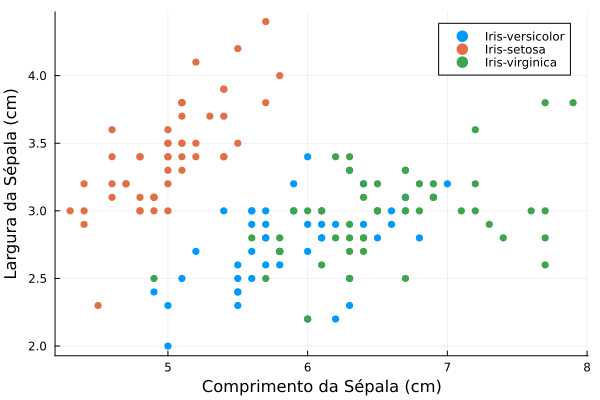

In [53]:
let
    function getVariableBySpecie(var::Symbol, s::AbstractString)::Vector{Float64}
        data = Vector{Float64}[]
        if var == :slength
            data = copy(irisdf.slength[irisdf.species .== s])
        elseif var == :swidth
            data = copy(irisdf.swidth[irisdf.species .== s])
        end
        data
    end
    slsetosa = getVariableBySpecie(:slength, "Iris-setosa")
    slvirginica = getVariableBySpecie(:slength, "Iris-virginica")
    slversicolor = getVariableBySpecie(:slength, "Iris-versicolor")

    swsetosa = getVariableBySpecie(:swidth, "Iris-setosa")
    swvirginica = getVariableBySpecie(:swidth, "Iris-virginica")
    swversicolor = getVariableBySpecie(:swidth, "Iris-versicolor")

    scatter(slversicolor, swversicolor, msw=0, label="Iris-versicolor")
    scatter!(slsetosa, swsetosa, msw=0, label="Iris-setosa")
    scatter!(slvirginica, swvirginica, msw=0, label="Iris-virginica")
    xlabel!("Comprimento da Sépala (cm)")
    ylabel!("Largura da Sépala (cm)")

end

## Análise Multivariada
Utilizaremos uma matriz de correlação(Pearson) para tentar encontrar correlações lineares entre as variáveis.
Podemos observar que as variáveis comprimento da sépala x comprimento da pétala, largura da sépala x comprimento da pétala possuem correlação linear positiva forte, o que possibilita a criação e emprego de modelos lineares de regressão.
* Na minha opinião, é muito mais fácil entender uma matriz de correlação, do que um plot em pares (pair plot).

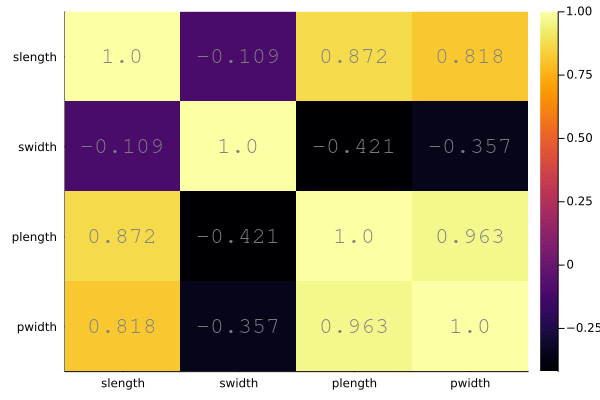

In [67]:
cols = [:slength, :swidth, :plength, :pwidth]
M = Matrix(irisdf[!, cols])
corm = cor(M)
(n, m) = size(corm)
heatmap(corm, yflip=true, yticks=(1:m, cols), xticks=(1:n, cols))
annotate!([(j, i, text(round(corm[i, j], digits=3), 12, "Arial", :gray)) for i in 1:n for j in 1:m])